# *Iterator Pattern*

---

## 1. Iterator Pattern

- Iteraotr 디자인 패턴은 객체 지향 프로그래미에서 사용되는 패턴으로 컬렉션의   
내부 구조를 노출하지 않고 그 요소들에 접근할 수 있는 방법을 제공하는 패턴

- 주로 집합체 객체의 요소들을 순차적으로 접근해야 하는 경우에 사용됨

1. 데이터의 집합은 리스트나 트리, 그래프, 테이블 등으로 저장된다.

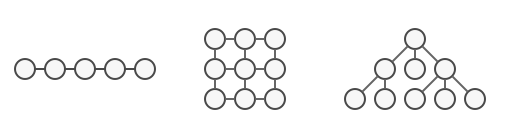

2. 어떤 기준으로 순회할지 자료 구조마다 다를 수 있다.

    - 다만, 해시와 트리 같은 구조는 데이터 저장 순서가 정해지지 않고 적재되기 떄문에,   
    어떤 기준으로 접근해야할 지 애매해진다.

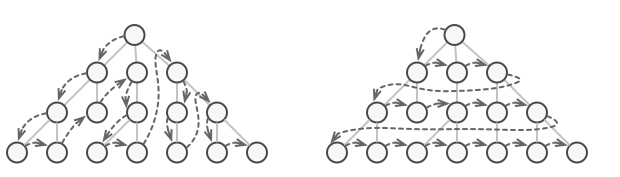


3. 위 처럼 복잡하게 얽혀있는 자료 구조들을 순회하는 알고리즘 전략을 정의하는 것을 이터레이터 패턴이라 한다.

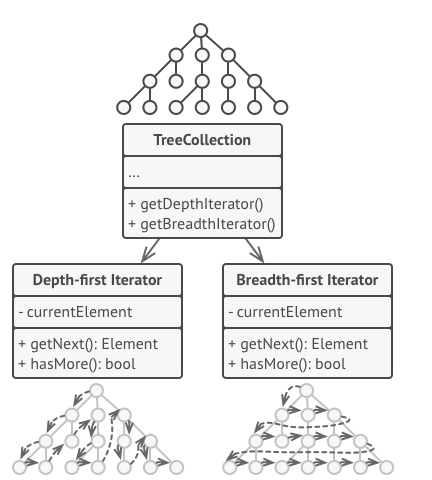


4. Iterator Pattern 구조

    1. Aggregate (인터페이스) : ConcreateIterator 객체를 반환하는 인터페이스를 제공한다.

    2. ConcreateAggregate (클래스) : 여러 요소들이 이루어져 있는 데이터 집합체

    3. 집합체 내의 요소들을 순서대로 검색하기 위한 인터페이스를 제공한다.

        - hasNext() : 순회할 다음 요소가 있는지 확인 (true / false)

        - next() : 요소를 반환하고 다음 요소를 반환할 준비를 하기 위해 커서를 이동시킴

    4. ConcreateIterator (클래스) : 반복자 객체

        - ConcreateAggregate가 구현한 메서드로부터 생성되며, ConcreateAggregate 의 컬렉션을 참조하여 순회한다.
        
        - 어떤 전략으로 순회할지에 대한 로직을 구체화 한다.

        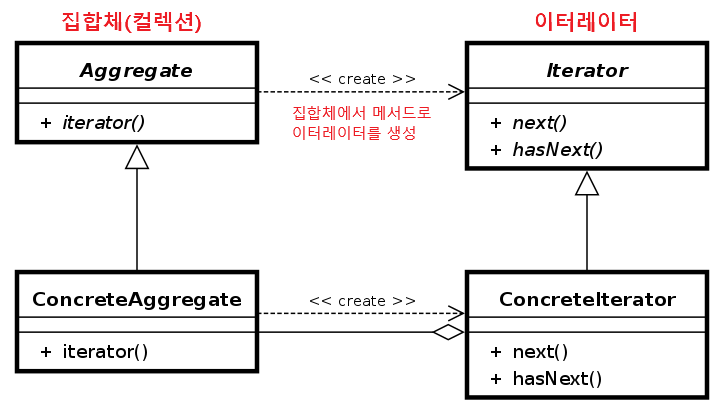


---

## 2. Iterator Pattern

- Iterator Pattern 상품 주문 예제

    1. Iterator (반복자): 주문 목록의 요소들을 순회하는 인터페이스를 정의

    2. ConcreteIterator (구체적 반복자): OrderIterator 인터페이스를 구현하여 실제로 주문 목록을 순회

    3. Aggregate (집합체): OrderIterator 객체를 생성하는 인터페이스를 정의

    4. ConcreteAggregate (구체적 집합체): OrderAggregate 인터페이스를 구현하여 실제로 주문 목록을 저장하고 관리


```python
from typing import Any, List

# Aggregate 인터페이스
class Aggregate:
    def createIterator(self) -> 'Iterator':
        pass

# Iterator 인터페이스
class Iterator:
    def hasNext(self) -> bool:
        pass

    def next(self) -> Any:
        pass

# ConcreteAggregate 클래스
class ConcreteAggregate(Aggregate):
    def __init__(self) -> None:
        self._orders: List[Any] = []

    def createIterator(self) -> Iterator:
        return ConcreteIterator(self)

    def addOrder(self, order: Any) -> None:
        self._orders.append(order)

    def __getitem__(self, index: int) -> Any:
        return self._orders[index]

    def __len__(self) -> int:
        return len(self._orders)

# ConcreteIterator 클래스
class ConcreteIterator(Iterator):
    def __init__(self, aggregate: ConcreteAggregate) -> None:
        self._aggregate = aggregate
        self._index = 0

    def hasNext(self) -> bool:
        return self._index < len(self._aggregate)

    def next(self) -> Any:
        if self.hasNext():
            item = self._aggregate[self._index]
            self._index += 1
            return item
        raise StopIteration

# 예제 사용
if __name__ == "__main__":
    order_list = ConcreteAggregate()
    order_list.addOrder("Order 1: 2 apples")
    order_list.addOrder("Order 2: 3 bananas")
    order_list.addOrder("Order 3: 1 orange")

    iterator = order_list.createIterator()
    
    while iterator.hasNext():
        print(iterator.next())


```

















